<a href="https://colab.research.google.com/github/girisoura/DATATHON-GUVI-IITM/blob/main/Copy_of_IITM_Pravartak_Datathon'23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [347]:
df_train=pd.read_excel("House_Rent_Train.xlsx")

In [348]:
df_train.tail(100)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20455,ff8081815880273f01588076d10c1857,BHK3,Marathahalli,16-08-2017 19:22,12.964852,77.713004,FAMILY,0,0,0,...,2.0,E,3.0,2.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.0,26000.0
20456,ff8081815d208904015d213a82d567ab,BHK2,Kachamaranahalli,2017-08-07 14:07:00,12.917748,77.727136,FAMILY,0,0,0,...,2.0,E,3.0,4.0,4.0,"{""PARK"":true,""HK"":true,""LIFT"":true,""PB"":true,""...",BOREWELL,AP,2.0,17000.0
20457,ff80818164ef718f0164f04f11b80978,BHK2,Koramangala 4th block,31-07-2018 20:57,12.934922,77.630495,ANYONE,0,0,0,...,2.0,N,2.0,1.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,31000.0
20458,ff80818161089db90161180731743c89,BHK2,Jayanagar,21-01-2018 18:09,12.939164,77.581398,FAMILY,0,1,0,...,2.0,W,6.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,31000.0
20459,ff8081815fa0dc47015fa109cce105c6,BHK2,Whitefield,2017-09-11 20:30:00,12.964048,77.732884,FAMILY,0,0,0,...,2.0,W,2.0,1.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",BOREWELL,AP,0.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [349]:
#df_train.duplicated().sum()

In [350]:
df_no_duplicates = df_train.drop_duplicates()
df_train = df_no_duplicates.reset_index(drop=True)

In [351]:
df_train.isnull().sum()

id                   0
type                15
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [352]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20523 non-null  object 
 1   type             20508 non-null  object 
 2   locality         20363 non-null  object 
 3   activation_date  20500 non-null  object 
 4   latitude         20500 non-null  float64
 5   longitude        20500 non-null  float64
 6   lease_type       20500 non-null  object 
 7   gym              20523 non-null  int64  
 8   lift             20523 non-null  int64  
 9   swimming_pool    20523 non-null  int64  
 10  negotiable       20523 non-null  int64  
 11  furnishing       20523 non-null  object 
 12  parking          20523 non-null  object 
 13  property_size    20523 non-null  int64  
 14  property_age     20500 non-null  float64
 15  bathroom         20500 non-null  float64
 16  facing           20500 non-null  object 
 17  cup_board   

In [353]:
df_train = df_train.fillna({'property_age': df_train['property_age'].mean()})


In [354]:
df_train['property_age'].isnull().sum()

0

In [355]:
df_train = df_train.fillna({'facing': df_train['facing'].mode()})


In [356]:
df_train = df_train.fillna({'property_age': df_train['property_age'].mean()})


In [357]:
df_train.dropna(inplace=True)

In [358]:
df_train.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [359]:
df_train.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000
mean,12.945749,77.637238,0.226359,0.361006,0.174633,0.711401,1061.571253,5.776244,1.857887,4.570222,1.869382,3.798595,1.147615,19049.434838
std,0.029582,0.110805,0.418485,0.480304,0.379662,0.453122,591.873599,6.360285,0.710982,336.592272,2.182070,3.185034,0.993529,8433.565460
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918242,77.571891,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943792,77.633367,0.000000,0.000000,0.000000,1.000000,1045.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970914,77.695707,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


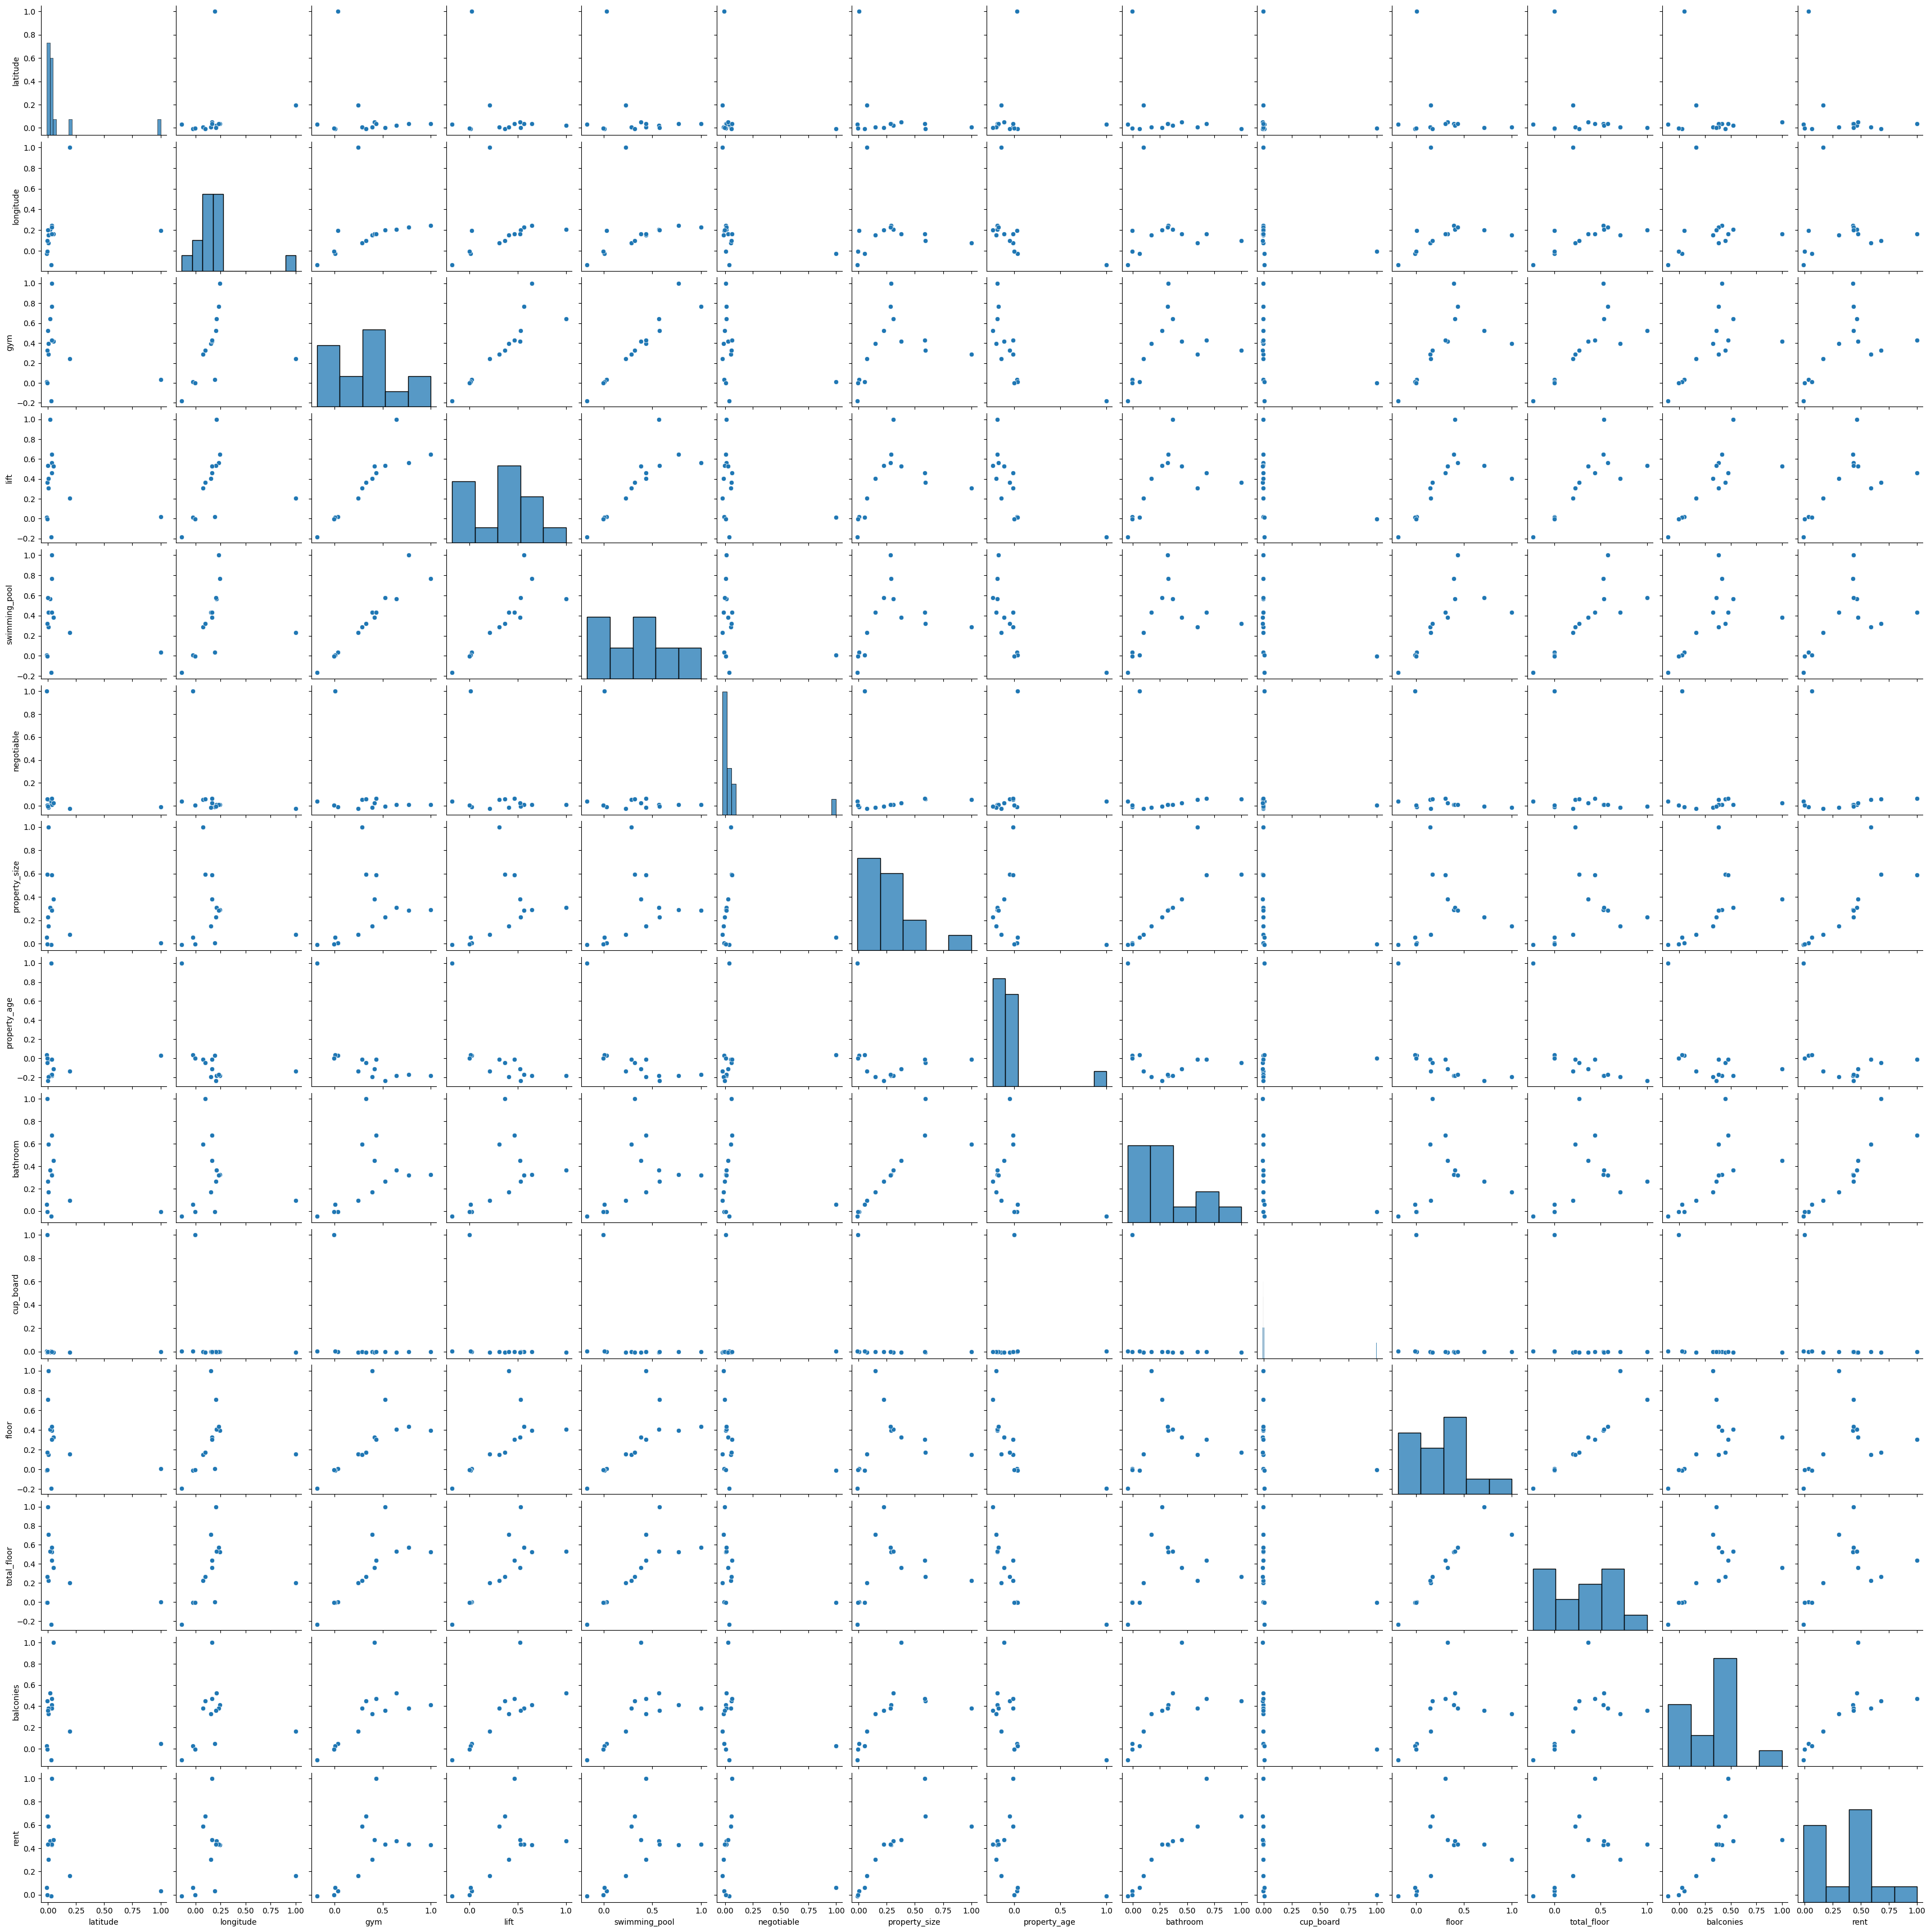

In [454]:
sns.pairplot(df_train.corr())

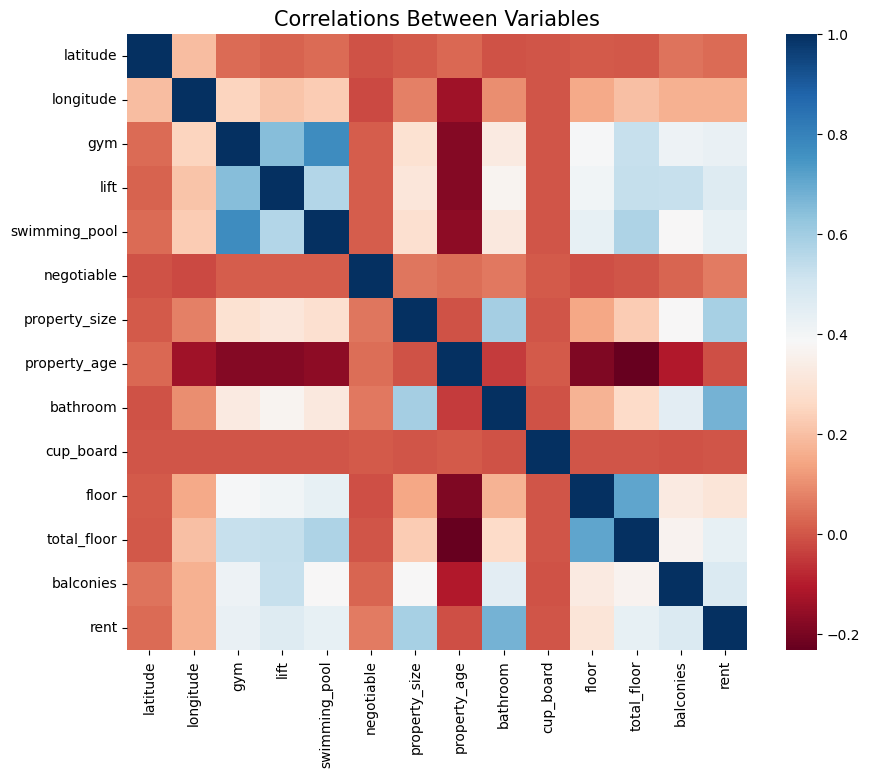

In [360]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [361]:
print("Missing Values by Column")
print("-"*30)
print(df_train.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df_train.isna().sum().sum())

Missing Values by Column
------------------------------
id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [362]:
df=df_train

In [363]:
df = df.reset_index(drop=True)

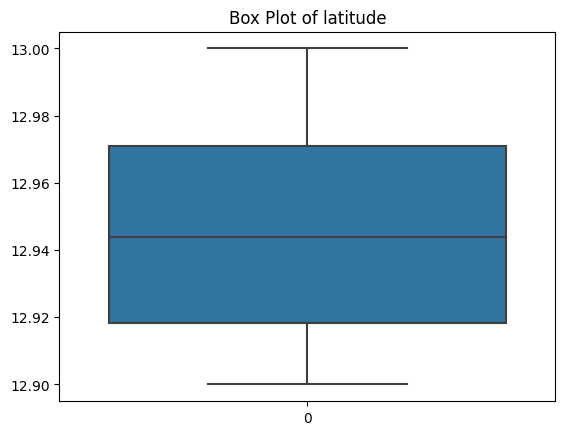

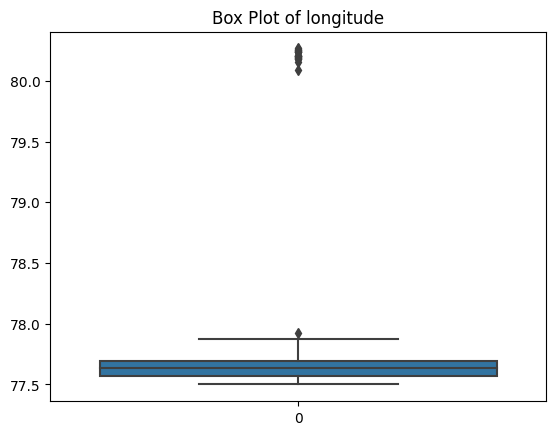

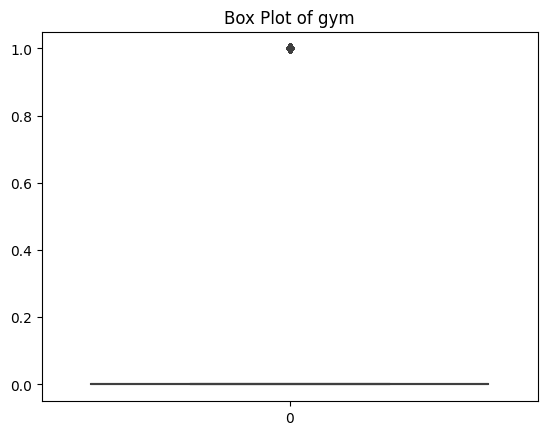

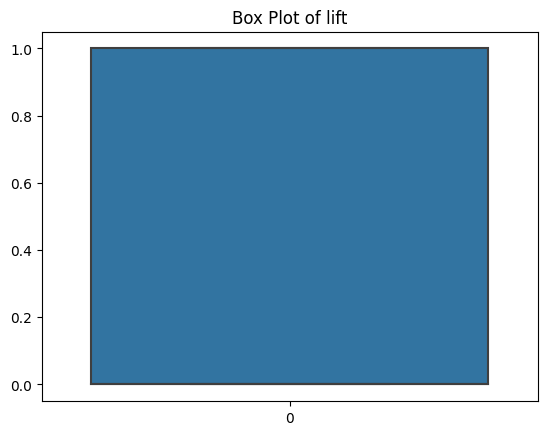

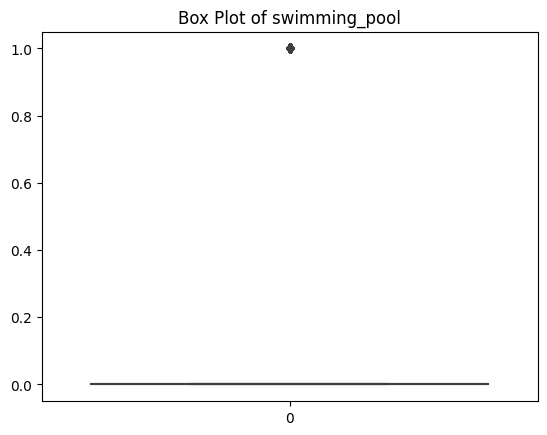

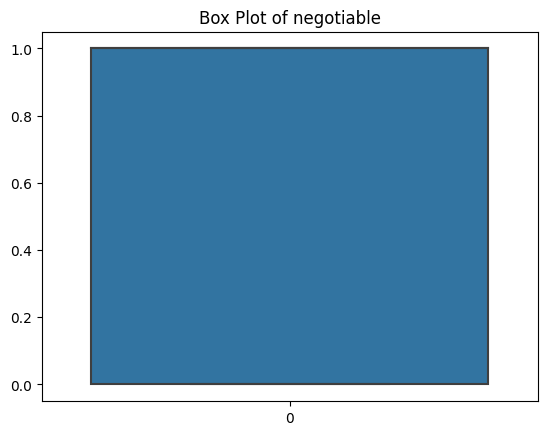

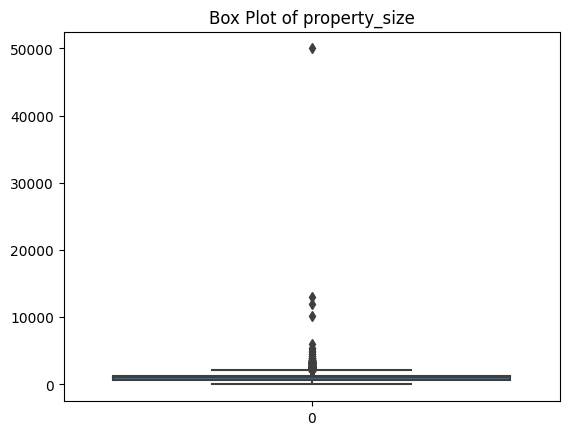

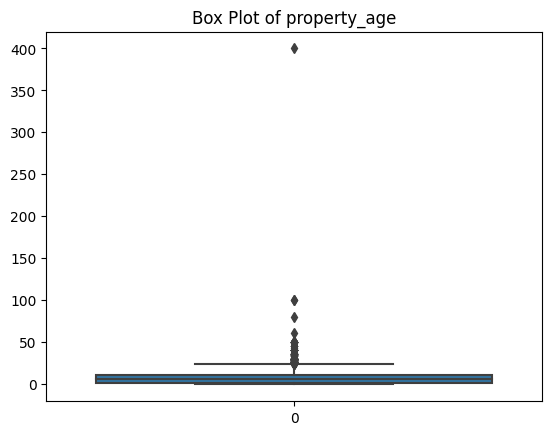

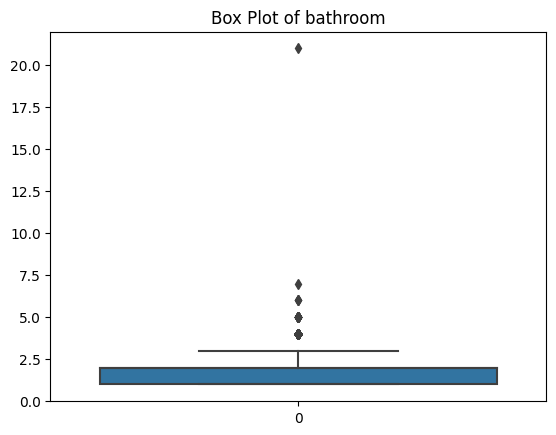

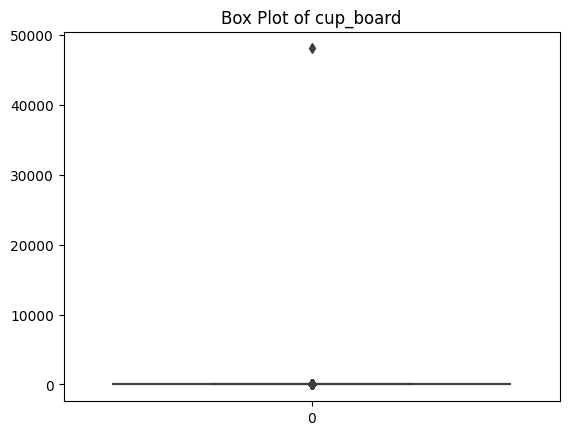

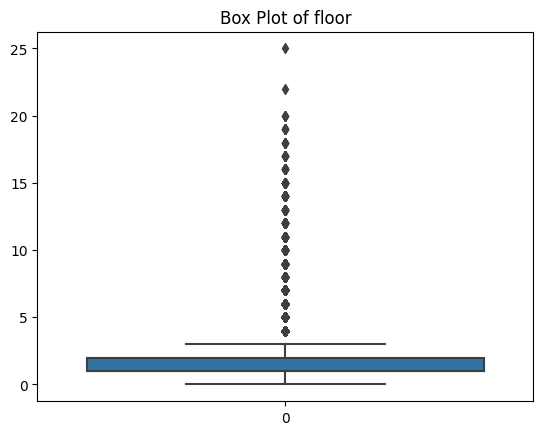

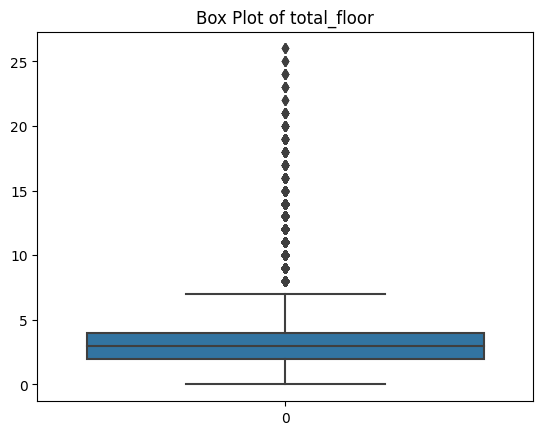

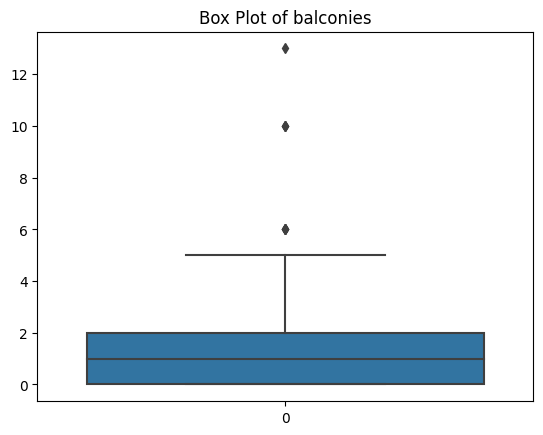

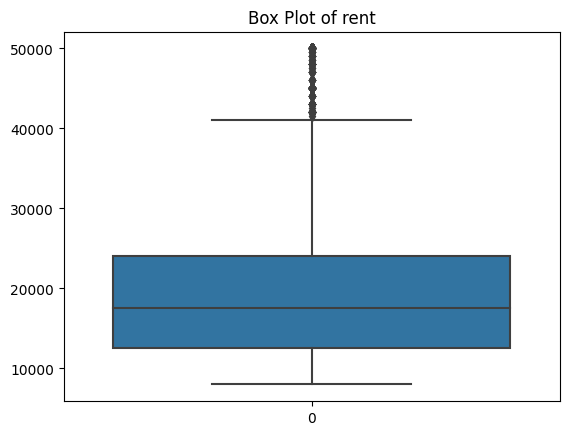

In [364]:
for column in df.select_dtypes(include=['int', 'float']).columns:
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [365]:
df['floor'].value_counts()

1.0     5844
0.0     4962
2.0     4500
3.0     2562
4.0     1179
5.0      288
6.0      204
7.0      187
9.0      130
8.0      119
10.0     100
11.0      86
12.0      57
14.0      44
13.0      31
15.0      23
16.0      16
17.0       9
19.0       6
18.0       5
20.0       3
25.0       1
22.0       1
Name: floor, dtype: int64

<Axes: xlabel='floor'>

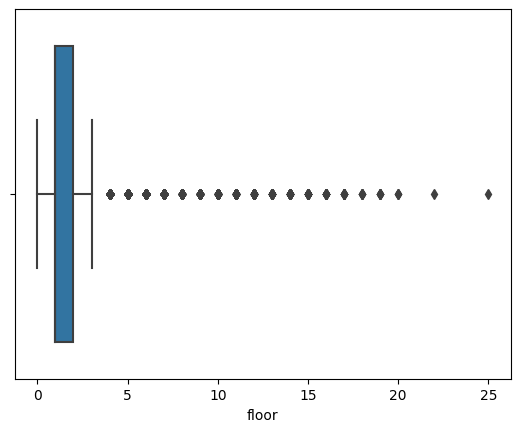

In [366]:
sns.boxplot(x=df['floor'])

In [367]:
upper_limit=df['floor'].mean() + 3*df['floor'].std()
lower_limit=df['floor'].mean()-3*df['floor'].std()

In [368]:
df['floor'] = np.where(df['floor']>upper_limit,upper_limit,np.where(df['floor']<lower_limit,lower_limit,df['floor']))

<Axes: xlabel='floor'>

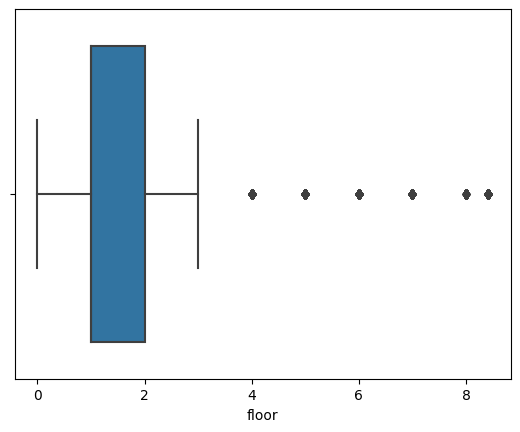

In [369]:
sns.boxplot(x=df['floor'])

In [370]:
def outlier_Remove(col):
  upper_limit=df[col].mean() + 3*df[col].std()
  lower_limit=df[col].mean()- 3*df[col].std()
  df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))
  return df[col]



In [371]:
df['balconies']=outlier_Remove('balconies')

In [372]:
df['cup_board']=outlier_Remove('cup_board')

<Axes: xlabel='cup_board'>

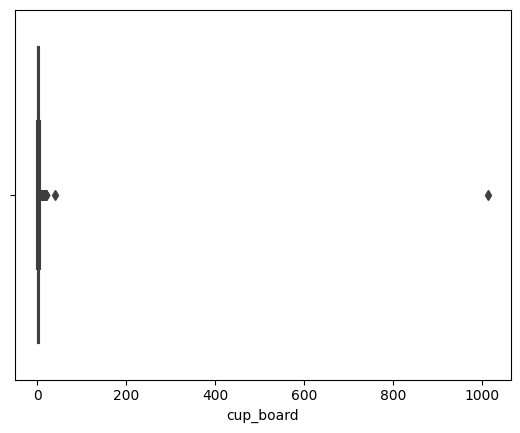

In [373]:
sns.boxplot(x=df['cup_board'])

In [374]:
df['total_floor']=outlier_Remove('total_floor')

In [375]:
df['total_floor'].value_counts()

2.000000     4833
4.000000     4776
3.000000     4635
1.000000     2095
5.000000     1468
13.353697     657
0.000000      360
6.000000      211
12.000000     209
9.000000      206
10.000000     195
11.000000     195
8.000000      180
13.000000     170
7.000000      167
Name: total_floor, dtype: int64

In [376]:
df['bathroom']=outlier_Remove('bathroom')

In [377]:
df['property_size']=outlier_Remove('property_size')

In [378]:
df['property_age']=outlier_Remove('property_age')

In [379]:
df['property_age'].value_counts()

 0.000000     3310
 10.000000    2851
 5.000000     2733
 1.000000     2102
 3.000000     1878
 2.000000     1318
 4.000000      977
 8.000000      948
 7.000000      819
 15.000000     772
 6.000000      769
 20.000000     413
 12.000000     341
 9.000000      325
 24.857098     295
 13.000000     101
 11.000000      99
 14.000000      82
 18.000000      59
 17.000000      42
 16.000000      42
-1.000000       33
 22.000000      14
 19.000000      11
 21.000000      11
 23.000000       8
 24.000000       4
Name: property_age, dtype: int64

In [380]:
df['rent']=outlier_Remove('rent')

In [381]:
df['type'].value_counts()

BHK2        11583
BHK3         4354
BHK1         3576
RK1           550
BHK4          232
BHK4PLUS       30
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

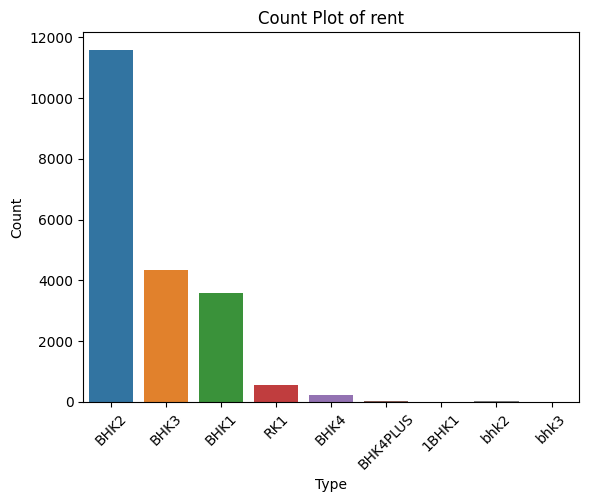

In [382]:
sns.countplot(x=df['type'],data=df)
plt.title(f'Count Plot of {column}')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

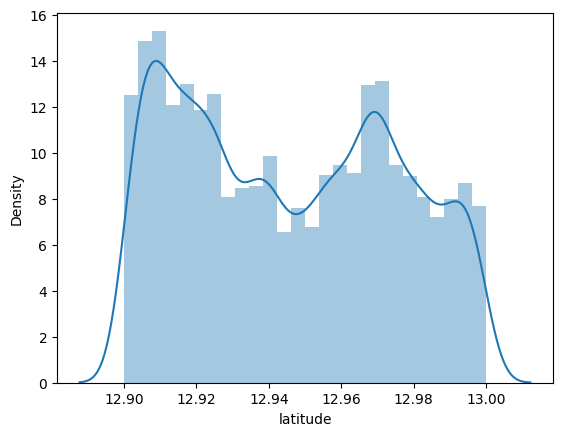

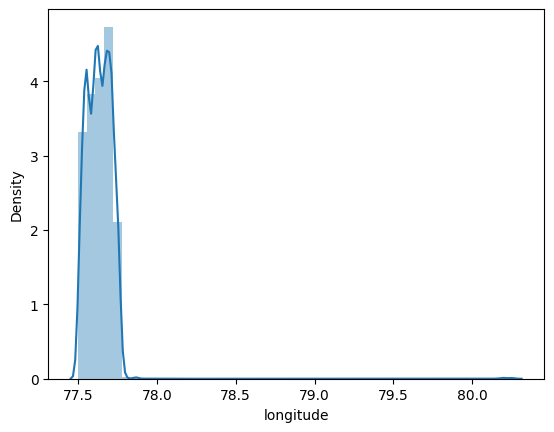

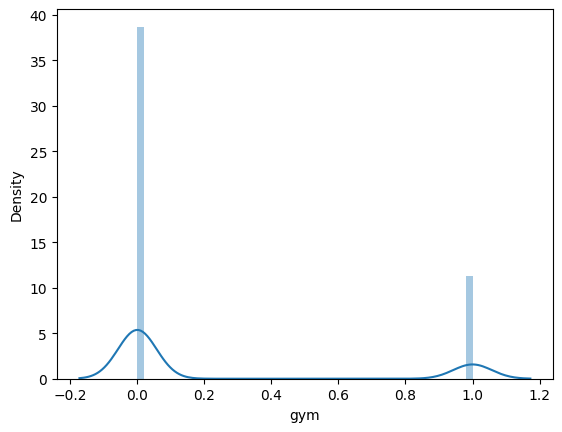

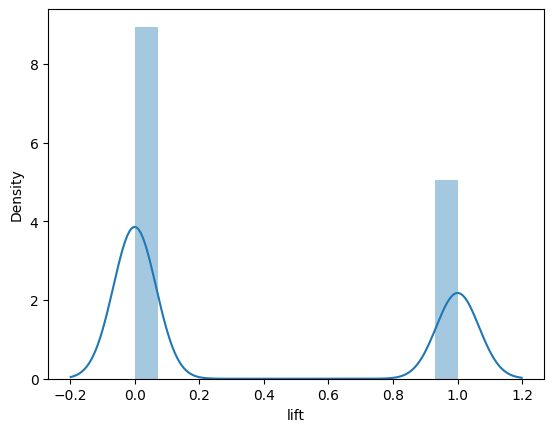

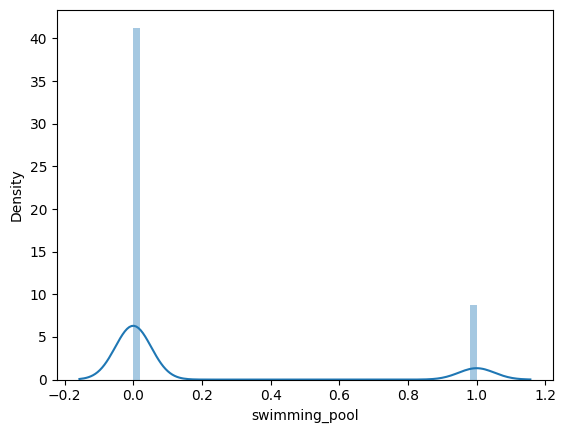

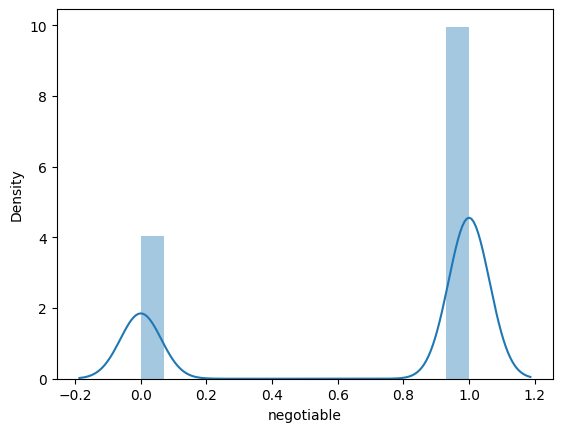

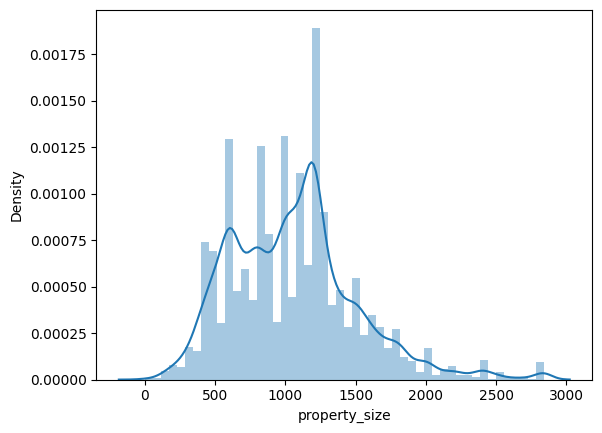

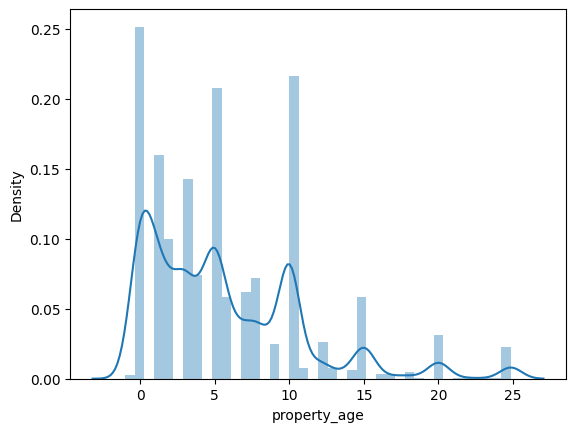

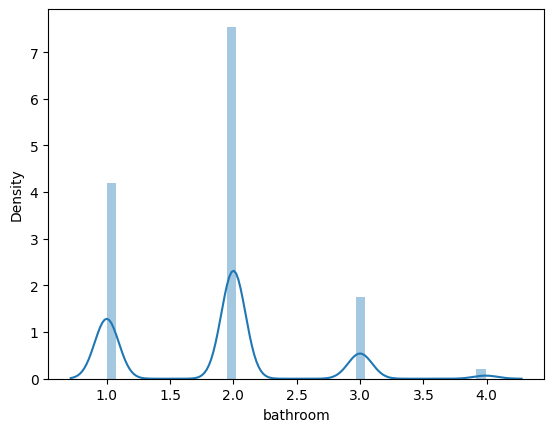

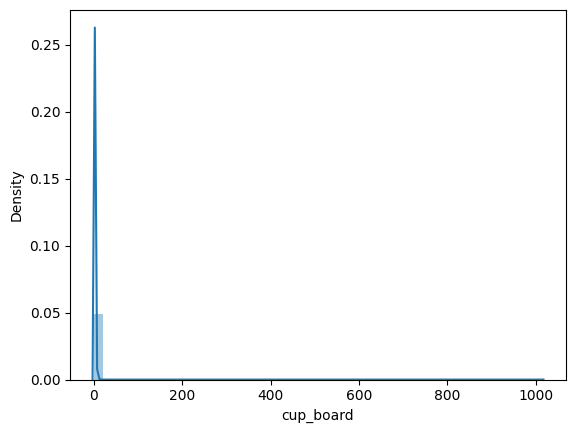

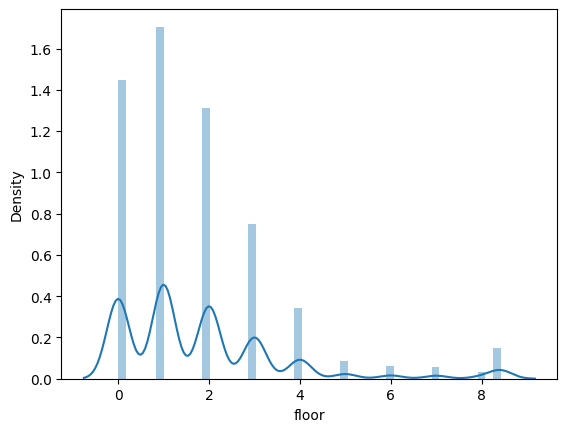

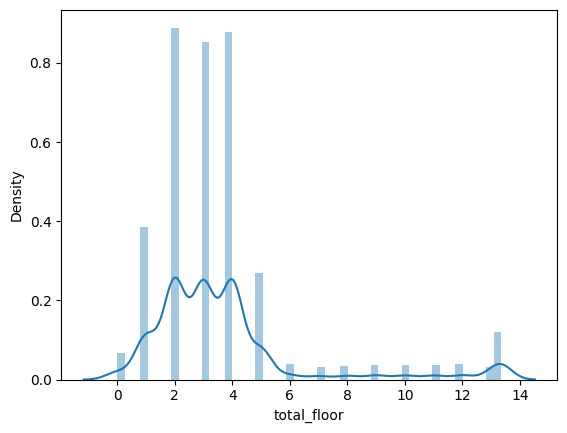

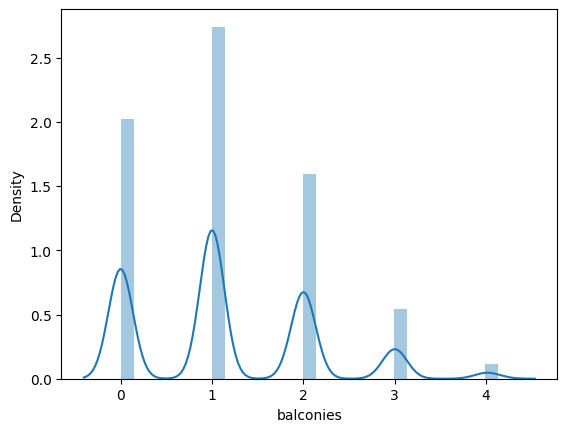

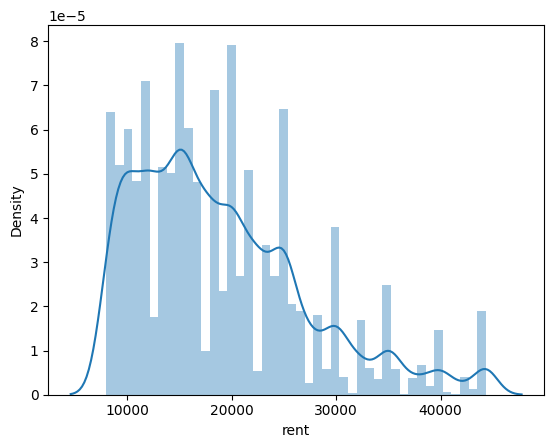

In [383]:
for column in df.select_dtypes(include=['int', 'float']).columns:
    sns.distplot(df[column])
    plt.show()

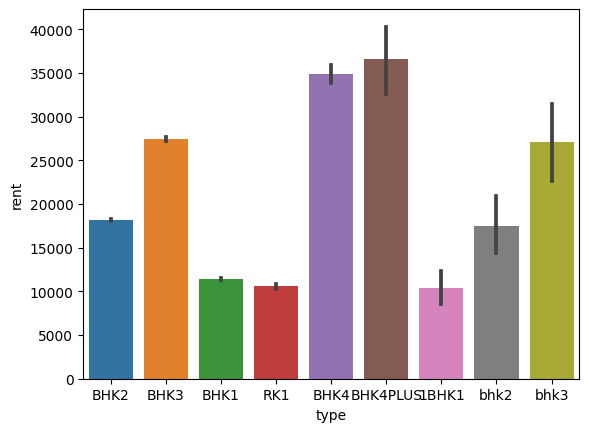

In [384]:
sns.barplot(x=df['type'],y=df['rent'])
plt.show()

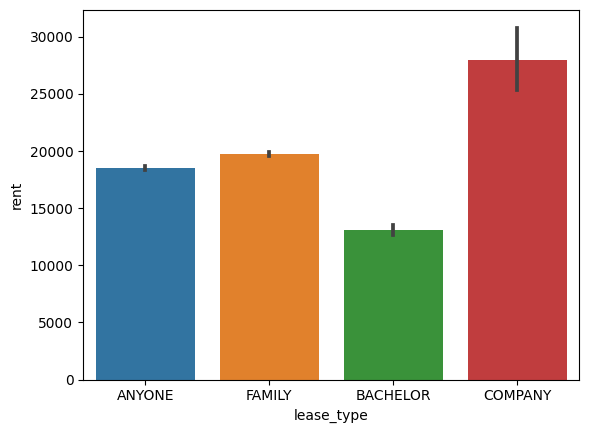

In [385]:
sns.barplot(x=df['lease_type'],y=df['rent'])
plt.show()

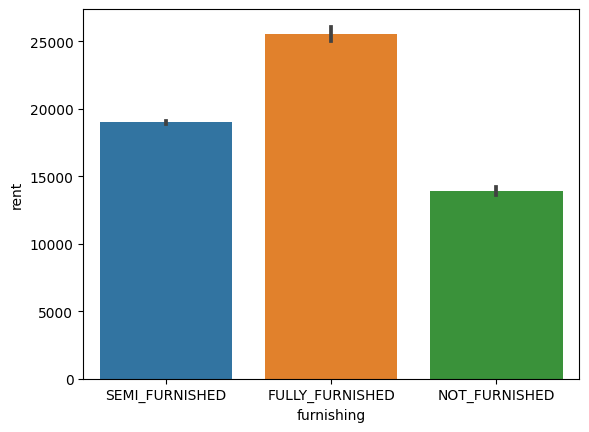

In [386]:
sns.barplot(x=df['furnishing'],y=df['rent'])
plt.show()

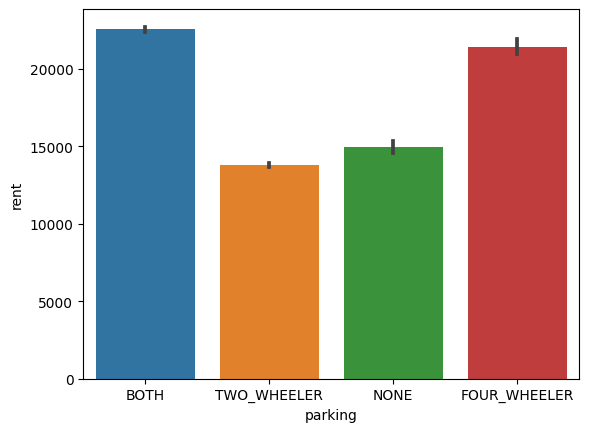

In [387]:
sns.barplot(x=df['parking'],y=df['rent'])
plt.show()

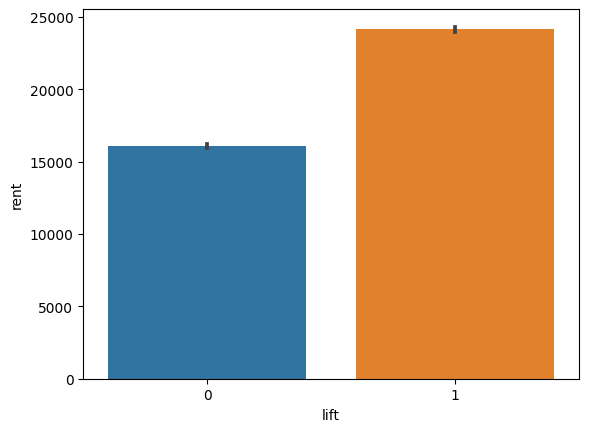

In [388]:
sns.barplot(x=df['lift'],y=df['rent'])
plt.show()

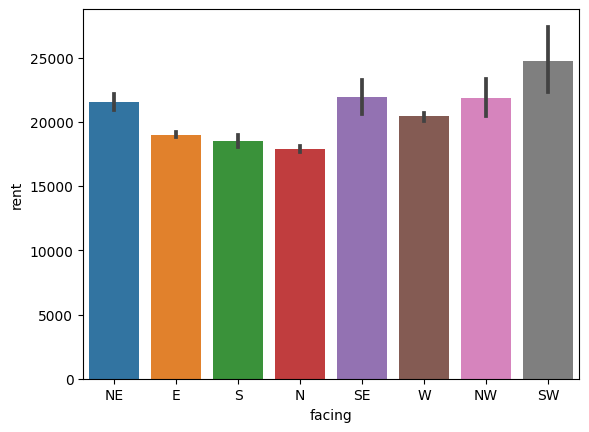

In [389]:
sns.barplot(x=df['facing'],y=df['rent'])
plt.show()

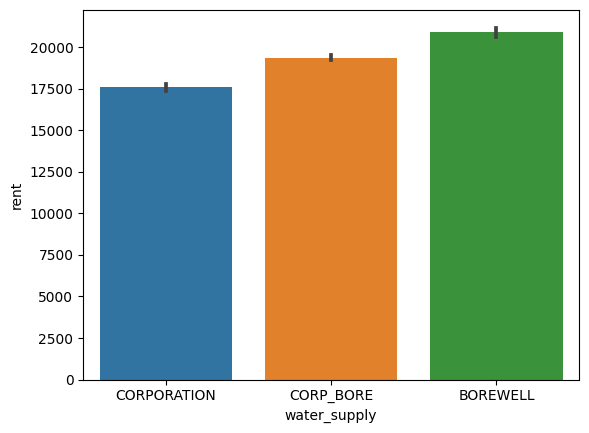

In [390]:
sns.barplot(x=df['water_supply'],y=df['rent'])
plt.show()

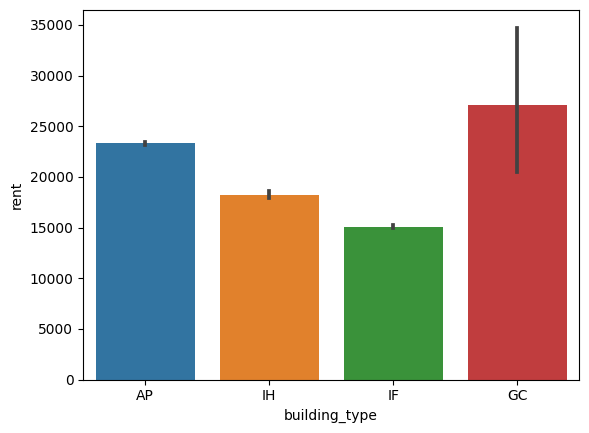

In [391]:
sns.barplot(x=df['building_type'],y=df['rent'])
plt.show()

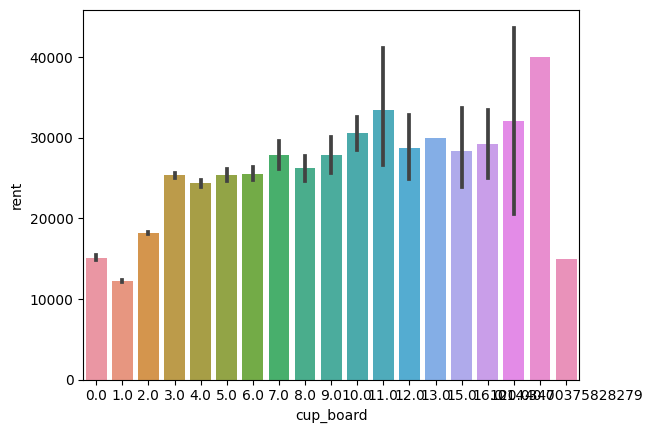

In [392]:
sns.barplot(x=df['cup_board'],y=df['rent'])
plt.show()

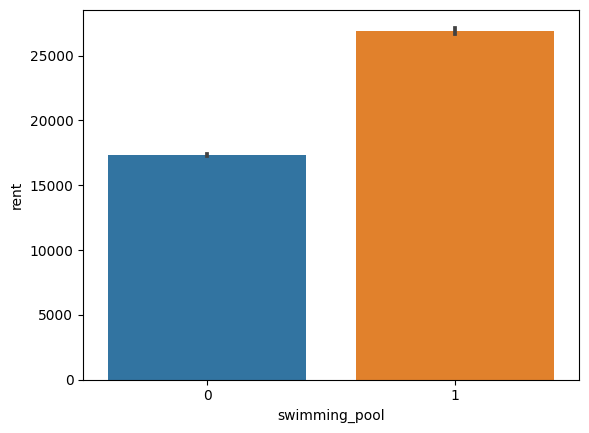

In [393]:
sns.barplot(x=df['swimming_pool'],y=df['rent'])
plt.show()

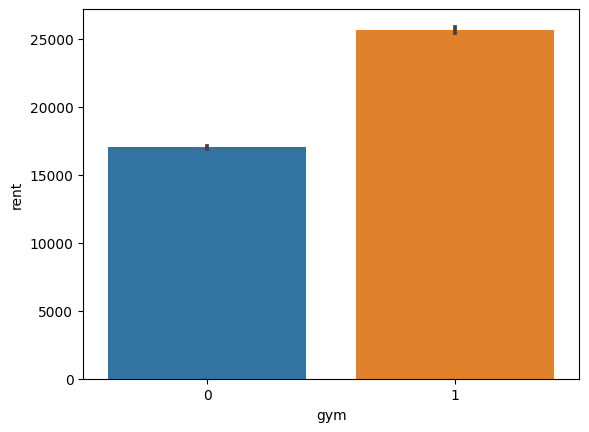

In [394]:
sns.barplot(x=df['gym'],y=df['rent'])
plt.show()

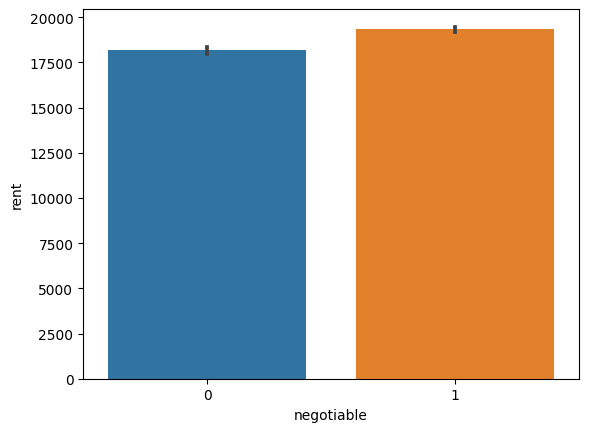

In [395]:
sns.barplot(x=df['negotiable'],y=df['rent'])
plt.show()

In [396]:
scale_mapper = {"RK1":1, "1BHK1":2, "BHK1":2,"BHK2":3,"bhk2":3,"BHK3":4,"bhk3":4,"BHK4":5,"BHK4PLUS":6}
df["type"] = df["type"].replace(scale_mapper)

In [397]:
df.drop(columns=['id'],inplace=True)

In [398]:
df

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,3,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.000000
1,4,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.000000
2,2,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.000000
3,4,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,44350.131218
4,2,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,...,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,2,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,...,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.000000
20353,3,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.000000
20354,3,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.000000
20355,3,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.000000


In [399]:
df['activation_date'].value_counts()

2017-04-11 18:11:00    4
21-04-2018 16:49       3
15-11-2017 21:43       3
25-08-2017 18:33       3
2018-04-03 17:25:00    3
                      ..
2017-02-10 14:07:00    1
15-03-2018 16:39       1
28-08-2017 13:20       1
2018-10-05 10:09:00    1
2018-08-07 22:31:00    1
Name: activation_date, Length: 19429, dtype: int64

In [400]:
from datetime import datetime
def calculate_activation_age(row, reference_date):
    activation_date = row['activation_date']

    age = reference_date.year - activation_date.year
    if (reference_date.month, reference_date.day) < (activation_date.month, activation_date.day):
        age -= 1

    return age

reference_date_str = '2023-08-13'
reference_date = datetime.strptime(reference_date_str, '%Y-%m-%d')

# Convert the 'activation_date' column to datetime objects
df['activation_date'] = pd.to_datetime(df['activation_date'])

df['activation_age'] = df.apply(lambda row: calculate_activation_age(row, reference_date), axis=1)


In [401]:
df.drop(columns=['activation_date'],inplace=True)

In [402]:
df['water_supply'].value_counts()

CORP_BORE      10609
CORPORATION     6685
BOREWELL        3063
Name: water_supply, dtype: int64

In [403]:
scale = {"CORP_BORE":1, "CORPORATION":2, "BOREWELL":3}
df["water_supply"] = df["water_supply"].replace(scale)

In [404]:
df['building_type'].value_counts()

IF    9192
AP    8780
IH    2368
GC      17
Name: building_type, dtype: int64

In [405]:
scale_mapper = {"IF":1, "IH":2, "AP":3,"GC":4}
df["building_type"] = df["building_type"].replace(scale_mapper)

In [406]:
df['furnishing'].value_counts()

SEMI_FURNISHED     17767
NOT_FURNISHED       1424
FULLY_FURNISHED     1166
Name: furnishing, dtype: int64

In [407]:
scale_mapper = {"NOT_FURNISHED":1, "SEMI_FURNISHED":2, "FULLY_FURNISHED":3}
df["furnishing"] = df["furnishing"].replace(scale_mapper)

In [408]:
df['parking'].value_counts()

BOTH            10717
TWO_WHEELER      7169
FOUR_WHEELER     1436
NONE             1035
Name: parking, dtype: int64

In [409]:
scale_mapper = {"NONE":1, "TWO_WHEELER":2, "FOUR_WHEELER":3,"BOTH":4}
df["parking"] = df["parking"].replace(scale_mapper)

In [410]:
df['lease_type'].value_counts()

FAMILY      10101
ANYONE       9614
BACHELOR      584
COMPANY        58
Name: lease_type, dtype: int64

In [411]:
scale_mapper = {"BACHELOR":1, "ANYONE":2, "FAMILY":3,"COMPANY":4}
df["lease_type"] = df["lease_type"].replace(scale_mapper)

In [412]:
df['facing'].value_counts()

E     9445
N     5882
W     2608
S     1211
NE     810
SE     193
NW     149
SW      59
Name: facing, dtype: int64

In [413]:
scale_mapper = {"S":1, "N":1, "E":2,"W":2,"NE":3,"SE":3,"NW":3,"SW":4}
df["facing"] = df["facing"].replace(scale_mapper)

Top Localities

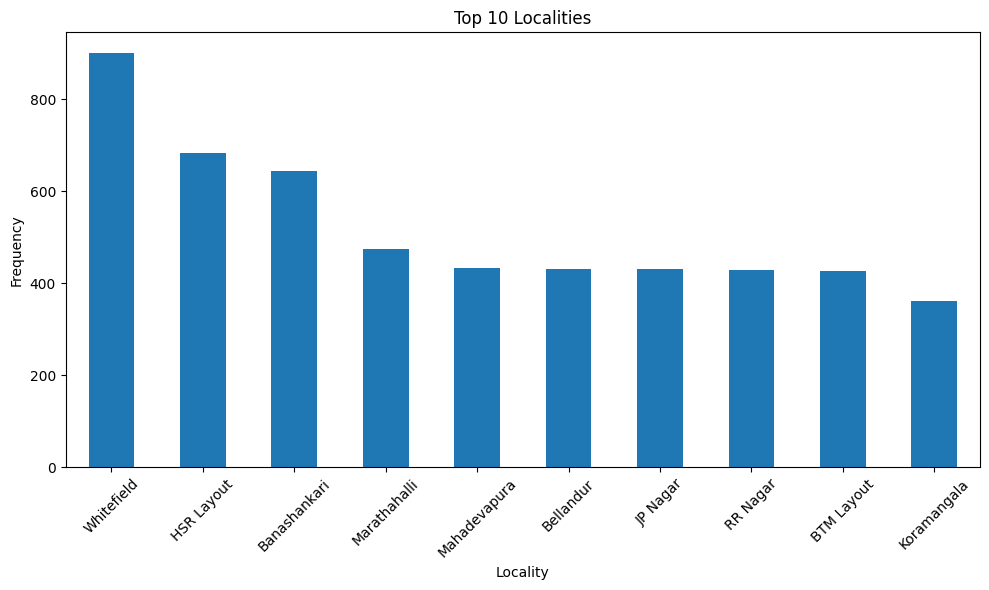

In [414]:
# Calculate the frequency of each locality
locality_counts = df['locality'].value_counts()
# Choose the number of top localities to plot
top_localities = 10
# Select the top localities based on frequency
top_locality_counts = locality_counts.head(top_localities)
# Plot the top localities
plt.figure(figsize=(10, 6))
top_locality_counts.plot(kind='bar')
plt.title(f'Top {top_localities} Localities')
plt.xlabel('Locality')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 2000x500 with 0 Axes>

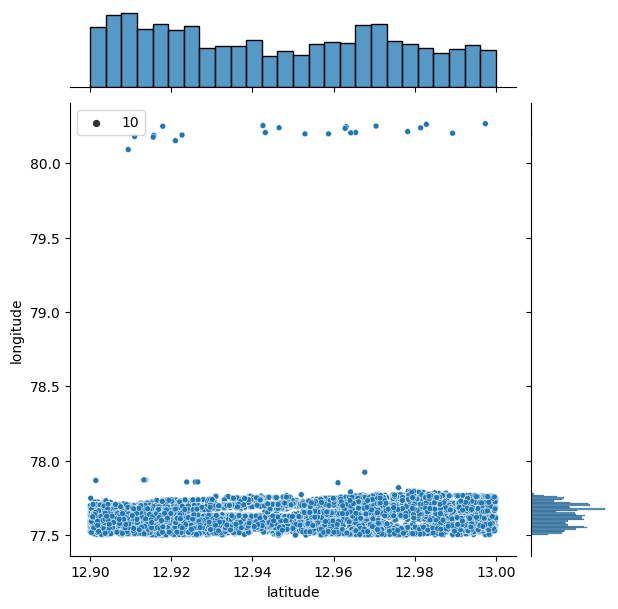

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [415]:
plt.figure(figsize=(20,5))
sns.jointplot(x=df.latitude.values,y=df.longitude.values,size=10)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.show()
sns.despine

In [416]:
import json
def count_true(json_string):
    json_string = str(json_string)
    return json_string.count(":true")

# Apply the function to the 'amenities' column
df['true_count'] = df['amenities'].apply(count_true)

In [417]:
df.drop(columns=['amenities'],inplace=True)

In [418]:
df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_age,true_count
0,3,Bellandur,12.929557,77.672280,2,0,1,0,1,2,...,3,2.0,3.0,4.0,2,3,2.0,22000.000000,5,8
1,4,Thiruvanmiyur,12.982870,80.262012,3,0,1,0,0,2,...,2,3.0,1.0,5.0,1,3,3.0,28000.000000,4,6
2,2,Attiguppe,12.955991,77.531634,3,0,0,0,1,2,...,2,1.0,1.0,2.0,2,2,0.0,8000.000000,5,0
3,4,Kodihalli,12.963903,77.649446,3,0,0,0,1,2,...,2,4.0,0.0,0.0,2,2,1.0,44350.131218,5,3
4,2,"Seetharampalya,Hoodi",12.986196,77.718314,3,1,1,1,1,2,...,2,1.0,3.0,5.0,1,3,2.0,18000.000000,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,2,Ulsoor,12.979762,77.615395,2,0,1,0,1,2,...,2,1.0,1.0,4.0,1,3,1.0,20000.000000,5,9
20353,3,Koramangala 4th Block,12.931072,77.632361,2,0,0,0,1,2,...,1,2.0,1.0,2.0,2,2,2.0,30000.000000,5,4
20354,3,Kumaraswamy Layout,12.901800,77.566597,3,1,1,0,1,2,...,2,2.0,5.0,5.0,3,3,2.0,16000.000000,5,8
20355,3,Indiranagar,12.965502,77.647694,3,0,1,0,0,2,...,2,2.0,2.0,4.0,1,3,3.0,30000.000000,5,10


In [419]:
df.drop(columns=['locality'],inplace=True)

In [420]:
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_age,true_count
0,3,12.929557,77.672280,2,0,1,0,1,2,4,...,3,2.0,3.0,4.0,2,3,2.0,22000.000000,5,8
1,4,12.982870,80.262012,3,0,1,0,0,2,4,...,2,3.0,1.0,5.0,1,3,3.0,28000.000000,4,6
2,2,12.955991,77.531634,3,0,0,0,1,2,2,...,2,1.0,1.0,2.0,2,2,0.0,8000.000000,5,0
3,4,12.963903,77.649446,3,0,0,0,1,2,4,...,2,4.0,0.0,0.0,2,2,1.0,44350.131218,5,3
4,2,12.986196,77.718314,3,1,1,1,1,2,4,...,2,1.0,3.0,5.0,1,3,2.0,18000.000000,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,2,12.979762,77.615395,2,0,1,0,1,2,2,...,2,1.0,1.0,4.0,1,3,1.0,20000.000000,5,9
20353,3,12.931072,77.632361,2,0,0,0,1,2,4,...,1,2.0,1.0,2.0,2,2,2.0,30000.000000,5,4
20354,3,12.901800,77.566597,3,1,1,0,1,2,4,...,2,2.0,5.0,5.0,3,3,2.0,16000.000000,5,8
20355,3,12.965502,77.647694,3,0,1,0,0,2,4,...,2,2.0,2.0,4.0,1,3,3.0,30000.000000,5,10


In [421]:
df.corr()

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_age,true_count
type,1.000000,-0.004471,0.015507,0.219551,0.273913,0.313158,0.267150,0.078472,0.093983,0.404310,...,0.071732,0.097910,0.107433,0.204444,0.001437,0.306097,0.394514,0.653136,0.032453,0.316235
latitude,-0.004471,1.000000,0.194260,-0.000809,0.034848,0.018849,0.033897,-0.009860,-0.012273,-0.000961,...,0.028520,-0.001053,0.005261,-0.000271,-0.027070,0.031180,0.049750,0.034244,-0.021693,0.031269
longitude,0.015507,0.194260,1.000000,-0.041676,0.245286,0.207901,0.229202,-0.023936,0.073148,0.156094,...,0.052104,0.010350,0.159669,0.213951,0.157030,0.233922,0.166917,0.165791,-0.021804,0.272849
lease_type,0.219551,-0.000809,-0.041676,1.000000,0.065002,0.092677,0.060370,-0.021130,-0.016992,0.130498,...,0.019362,0.028282,0.003978,0.032484,-0.005437,0.088238,0.071029,0.124980,0.010425,0.057723
gym,0.273913,0.034848,0.245286,0.065002,1.000000,0.644861,0.769674,0.009291,0.158857,0.380496,...,0.121338,0.049646,0.402372,0.549183,0.095578,0.539614,0.421270,0.435674,-0.001735,0.759182
lift,0.313158,0.018849,0.207901,0.092677,0.644861,1.000000,0.564556,0.011717,0.196868,0.510322,...,0.114744,0.058961,0.432821,0.565656,0.040322,0.750732,0.533112,0.467862,0.011374,0.712962
swimming_pool,0.267150,0.033897,0.229202,0.060370,0.769674,0.564556,1.000000,0.009985,0.136137,0.334543,...,0.112680,0.043794,0.437702,0.593060,0.087768,0.473052,0.388524,0.438107,-0.005220,0.742617
negotiable,0.078472,-0.009860,-0.023936,-0.021130,0.009291,0.011717,0.009985,1.000000,-0.001660,0.061387,...,0.007774,0.016103,-0.018417,-0.005189,0.028366,0.007016,0.027858,0.064147,-0.009370,0.034380
furnishing,0.093983,-0.012273,0.073148,-0.016992,0.158857,0.196868,0.136137,-0.001660,1.000000,0.186291,...,0.044585,0.064950,0.122822,0.149181,0.011570,0.201500,0.178116,0.247932,0.016224,0.216800
parking,0.404310,-0.000961,0.156094,0.130498,0.380496,0.510322,0.334543,0.061387,0.186291,1.000000,...,0.093336,0.067339,0.209765,0.313318,0.042222,0.526803,0.433528,0.479356,0.020441,0.480209


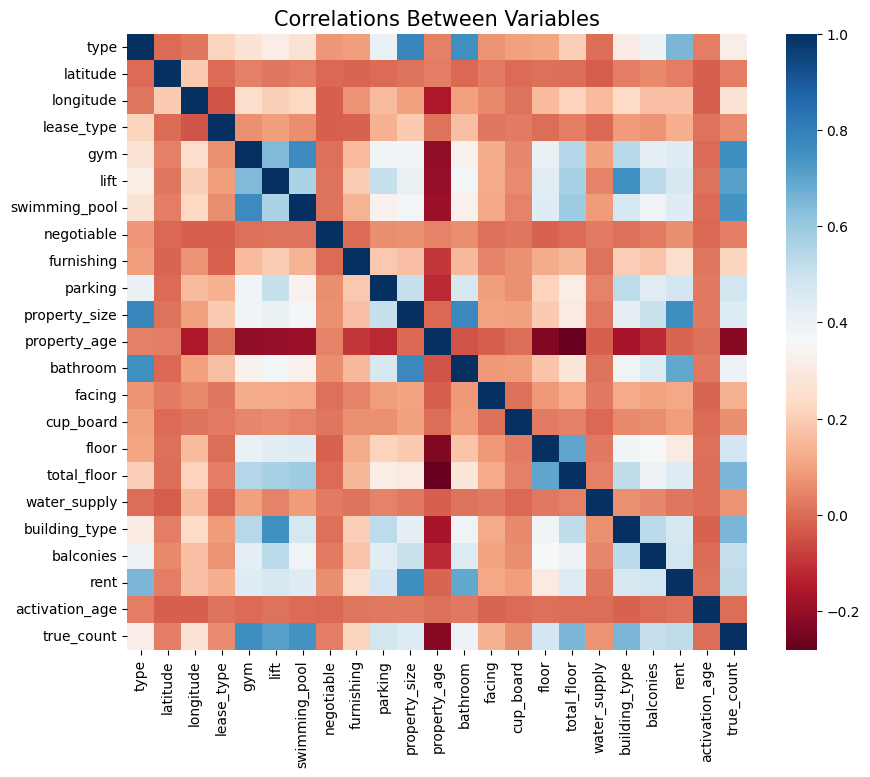

In [422]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [423]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['rent'].sort_values(ascending=False)

In [424]:
correlation_with_target

rent              1.000000
property_size     0.758271
bathroom          0.691326
type              0.653136
true_count        0.523604
balconies         0.480360
parking           0.479356
lift              0.467862
building_type     0.467092
total_floor       0.443058
swimming_pool     0.438107
gym               0.435674
floor             0.304004
furnishing        0.247932
longitude         0.165791
lease_type        0.124980
facing            0.110804
cup_board         0.094461
negotiable        0.064147
latitude          0.034244
water_supply      0.016362
activation_age    0.004915
property_age     -0.014099
Name: rent, dtype: float64

Feature selection

In [425]:
#df.drop(columns=['latitude','longitude'],inplace=True)

In [426]:
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_age,true_count
0,3,12.929557,77.672280,2,0,1,0,1,2,4,...,3,2.0,3.0,4.0,2,3,2.0,22000.000000,5,8
1,4,12.982870,80.262012,3,0,1,0,0,2,4,...,2,3.0,1.0,5.0,1,3,3.0,28000.000000,4,6
2,2,12.955991,77.531634,3,0,0,0,1,2,2,...,2,1.0,1.0,2.0,2,2,0.0,8000.000000,5,0
3,4,12.963903,77.649446,3,0,0,0,1,2,4,...,2,4.0,0.0,0.0,2,2,1.0,44350.131218,5,3
4,2,12.986196,77.718314,3,1,1,1,1,2,4,...,2,1.0,3.0,5.0,1,3,2.0,18000.000000,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,2,12.979762,77.615395,2,0,1,0,1,2,2,...,2,1.0,1.0,4.0,1,3,1.0,20000.000000,5,9
20353,3,12.931072,77.632361,2,0,0,0,1,2,4,...,1,2.0,1.0,2.0,2,2,2.0,30000.000000,5,4
20354,3,12.901800,77.566597,3,1,1,0,1,2,4,...,2,2.0,5.0,5.0,3,3,2.0,16000.000000,5,8
20355,3,12.965502,77.647694,3,0,1,0,0,2,4,...,2,2.0,2.0,4.0,1,3,3.0,30000.000000,5,10


In [427]:
y=df['rent']

In [428]:
X = df.drop('rent', axis=1)
y = df['rent']

In [429]:
X.shape

(20357, 22)

In [430]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [431]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [432]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)

In [433]:
y_pred = lr.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6603334545411199
MAE 3581.645230702478


In [434]:
lr_ridge=Ridge(alpha=10)
lr_model2=lr_ridge.fit(X_train,y_train)

In [435]:
y_pred_1 = lr_ridge.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_1))
print('MAE',mean_absolute_error(y_test,y_pred_1))

R2 score 0.6601136552769059
MAE 3581.4551407992153


In [449]:
lr_lasso=Lasso(alpha=0.001)
lr_model3=lr_lasso.fit(X_train,y_train)

In [450]:
y_pred_01 = lr_lasso.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_1))
print('MAE',mean_absolute_error(y_test,y_pred_1))

R2 score 0.6601136552769059
MAE 3581.4551407992153


DecisionTree

In [436]:
DT=DecisionTreeRegressor(max_depth=8)
DT_model=DT.fit(X_train,y_train)

In [437]:
y_pred_2 = DT_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_2))
print('MAE',mean_absolute_error(y_test,y_pred_1))

R2 score 0.713023235469759
MAE 3581.4551407992153


In [438]:
rf=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=16)
rf_model=rf.fit(X_train,y_train)

In [439]:
y_pred_3 = rf_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_3))
print('MAE',mean_absolute_error(y_test,y_pred_3))

R2 score 0.8067418185329058
MAE 2599.476621693032


In [440]:
adr=AdaBoostRegressor(n_estimators=20,learning_rate=0.1)
adr_model=adr.fit(X_train,y_train)

In [441]:
y_pred_4 = adr_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_4))
print('MAE',mean_absolute_error(y_test,y_pred_4))

R2 score 0.6408872130769934
MAE 3748.1788631265827


In [442]:
gb=GradientBoostingRegressor(n_estimators=500)
gb_model=gb.fit(X_train,y_train)

In [443]:
y_pred_5 = gb_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_5))
print('MAE',mean_absolute_error(y_test,y_pred_5))

R2 score 0.8190402762249691
MAE 2507.960615163174


In [444]:
xg=XGBRegressor(n_estimators=45,max_depth=12,learning_rate=0.1)
xg_model=xg.fit(X_train,y_train)

In [446]:
y_pred_6 = xg_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_6))
print('MAE',mean_absolute_error(y_test,y_pred_6))

R2 score 0.8139246111405484
MAE 2509.7887884038278


In [452]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)
vr=VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])
vr_model=vr.fit(X_train,y_train)

In [453]:
y_pred_7 = vr_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_7))
print('MAE',mean_absolute_error(y_test,y_pred_7))

R2 score 0.807788912936291
MAE 2593.711955819764
